In [11]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler,LabelEncoder
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("C:\\Users\\Simon\\PycharmProjects\\NeuronaleNetze\\data\\cars.csv")
data = data.sample(frac = 1)
data.columns = data.columns.astype(str)

#Modify Data

le = LabelEncoder()

#year
data["year"] = data["year"].apply(lambda x : sorted(data["year"].unique()).index(x))

#fuel
data["fuel"] = le.fit_transform(data["fuel"])

#seller_type
data["seller_type"] = le.fit_transform(data["seller_type"])

#transmission
data["transmission"] = le.fit_transform(data["transmission"])

#owner
data["owner"] = le.fit_transform(data["owner"])

#drop non-useful columns
data = data.drop("name", axis=1)

y = data["selling_price"].values
x = data.drop("selling_price", axis=1).values

st = StandardScaler()
x = st.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

from torch.utils.data import Dataset,DataLoader
class CarsDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X.astype(np.float32))
        self.Y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]
    def __getitem__(self, item):
        return self.X[item],self.Y[item]
    def __len__(self):
        return self.len

train_data = CarsDataset(xtrain,ytrain)
test_data = CarsDataset(xtest,ytest)
train_loader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=32,shuffle=True)

In [13]:
class TorchNet(nn.Module):
    def __init__(self):
        super(TorchNet, self).__init__()
        self.layer1 = nn.Linear(6,16)
        self.fn1 = nn.ReLU()
        self.layer2 = nn.Linear(16,4)
        self.fn2 = nn.ReLU()
        self.layer3 = nn.Linear(4,1)

    def forward(self,x):
        x = self.fn1(self.layer1(x))
        x = self.fn2(self.layer2(x))
        x = self.layer3(x)
        return x

In [14]:
fnn = TorchNet()
loss_fn = nn.L1Loss()
optimizer=torch.optim.Adam(fnn.parameters(),lr=0.002)

loss_values = []
tmp_loss = []

num_epochs = 200
for epoch in range(num_epochs):
    tmp_loss = []
    for X,y in train_loader:
        pred = fnn(X)

        loss = loss_fn(pred,y.unsqueeze(-1))
        tmp_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_values.append(np.mean(tmp_loss))

In [15]:
fnn.eval()
loss_values_test = []
with torch.no_grad():
    for X,y in test_loader:
        pred = fnn(X)
        print(pred)
        print(y.unsqueeze(-1))
        loss = loss_fn(pred,y.unsqueeze(-1))
        loss_values_test.append(loss.item())

print(loss_values_test)
print(np.mean(loss_values_test))

tensor([[ 657401.9375],
        [ 200307.0938],
        [  69687.3203],
        [ 507558.2188],
        [ 794293.7500],
        [ 105839.5234],
        [ 465381.7812],
        [ 322197.5000],
        [ 295512.5000],
        [  61177.3164],
        [1136253.8750],
        [ 636502.9375],
        [ 446941.4375],
        [ 765722.5000],
        [ 492743.2188],
        [ 577594.1250],
        [ 234731.3125],
        [ 368717.0000],
        [ 461005.6875],
        [ 818484.6250],
        [ 186068.3750],
        [  96929.3984],
        [ 651155.3750],
        [ 326374.9688],
        [ 333211.5625],
        [ 491889.0000],
        [ 274922.1562],
        [  97235.4609],
        [ 247082.1562],
        [ 415457.0000],
        [ 890132.1875],
        [ 227985.1250]])
tensor([[1000000.],
        [  93000.],
        [ 409999.],
        [ 300000.],
        [1150000.],
        [ 105000.],
        [ 475000.],
        [ 270000.],
        [ 325000.],
        [ 125000.],
        [4000000.],
        [ 5

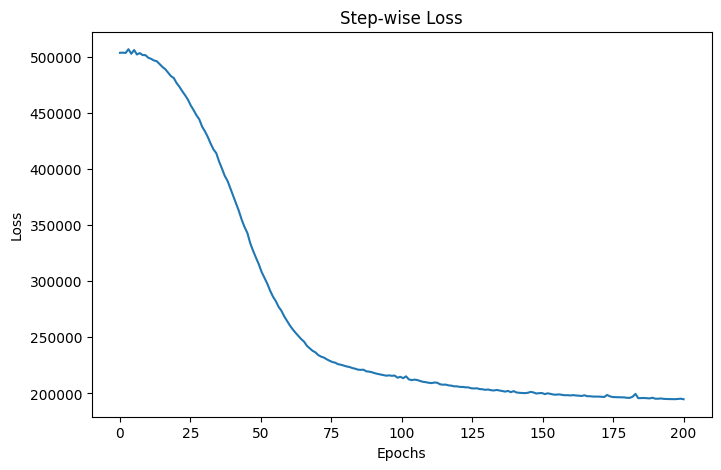

In [17]:
from matplotlib import pyplot as plt

step = np.linspace(0, 200, 200)
fig, ax = plt.subplots(figsize=(8,5))

plt.plot(step,np.array(loss_values))
plt.title("Step-wise Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()